In [2]:
# Import required Libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
# reading the datafile
df = pd.read_csv('../Data/Watson_healthcare.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# retrieving columns Label
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# Dataframe shape
df.shape

(1676, 35)

In [6]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Check for null values
null_counts = df.isnull().sum()

# Filter and print columns with non-zero null value counts
columns_with_null = null_counts[null_counts > 0].index
print(df[columns_with_null])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1676 rows x 0 columns]


We have Non null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [9]:
df.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


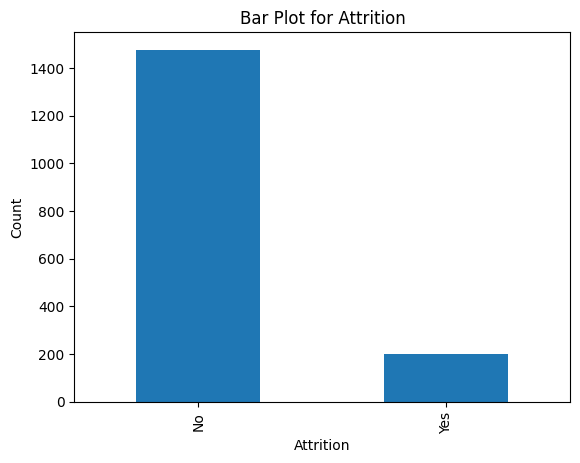

In [10]:
# Attrition label balance
# Specify the column name
column_name = 'Attrition'  # Replace with the actual column name

# Create a bar plot of the specified column
df[column_name].value_counts().plot(kind='bar')

# Set plot title and labels
plt.title('Bar Plot for {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Count')

# Display the plot
plt.show()

In [11]:
column_name = 'Attrition'  #
total_count = len(df)  # Total count of rows in the DataFrame
yes_count = df[column_name].value_counts().get('Yes', 0)  # Count of 'Yes' values in the column

percentage = (yes_count / total_count) * 100

print("Percentage of 'Yes' values in {}: {:.2f}%".format(column_name, percentage))

Percentage of 'Yes' values in Attrition: 11.87%


The class is imbalanced wit Attrition representing 11.87%

In [12]:
def plots(column_name):
  
    # Create a figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Plot histogram for a column
    axes[0].hist(df[column_name])
    axes[0].set_title('Histogram of {}'.format(column_name))
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Frequency')

    # Create a boxplot based on attrition
    sns.boxplot(data=df, x='Attrition', y=column_name, ax=axes[1])
    axes[1].set_title('Boxplot of {} by Attrition'.format(column_name))
    axes[1].set_xlabel('Attrition')
    axes[1].set_ylabel(column_name)

    # Create a violin plot to visualize selected column distribution by attrition
    sns.violinplot(data=df, x='Attrition', y=column_name, ax=axes[2])
    axes[2].set_title('Distribution of {} by Attrition'.format(column_name))
    axes[2].set_xlabel('Attrition')
    axes[2].set_ylabel(column_name)

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()



In [13]:
# statistical significance functions
# testing normality
# H0:normal
# H1: not normal
def normality (column_name):
    stat, p = stats.shapiro(df[column_name])
    if p < 0.05:
        return " for '{}'distirbution is not normal".format(column_name)
    else:
        return "for '{}'distirbution distirbution normal".format(column_name)
    
#testing mean equality a t-test for equal variance, the hypotheses are:
# H<sub>0</sub>: averages are equal
# H<sub>a</sub>: averages are not equal
def mean_equal (column_name):
    no_average = df[df['Attrition']=='No'][column_name]
    yes_average = df[df['Attrition']=='Yes'][column_name]
    stat, p = stats.ttest_ind(no_average, yes_average)
    if p < 0.05:
        return "average are not equal"
    else:
        return "average are equal"
    
 # average equality for non equal variance   
def equalmean_inequalvariance(column_name):
    no= df[df['Attrition']=='No'][column_name]
    yes = df[df['Attrition']=='Yes'][column_name]
    stat, p = stats.ttest_ind(no, yes, equal_var=False)
    if p < 0.05:
        return "average are not equal"
    else:
        return "average are equal"
 # average equality for equal variance
def mean_equal_all (column_name):
    no= df[df['Attrition']=='No'][column_name]
    yes = df[df['Attrition']=='Yes'][column_name]
    stat, p = stats.levene(no,yes)
    if p < 0.05:
        return "variance is not equal".format(column_name), equalmean_inequalvariance(column_name)
    else:
        return "variance is equal".format(column_name), mean_equal(column_name)



    


In [14]:
def plots_statistical_analysis(column_name):
    plots(column_name)
    return normality(column_name),mean_equal_all(column_name)


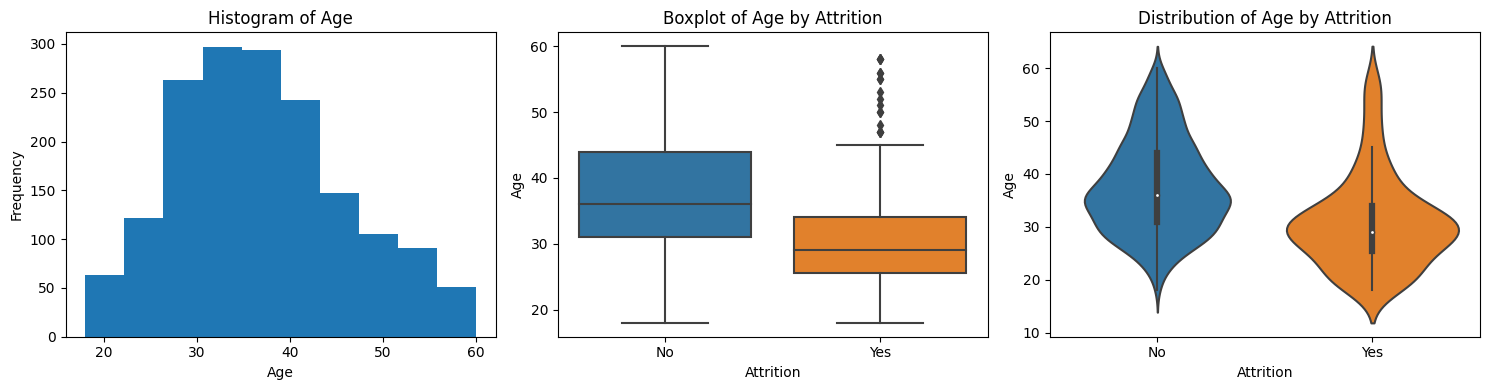

(" for 'Age'distirbution is not normal",
 ('variance is equal', 'average are not equal'))

In [15]:
plots_statistical_analysis('Age')



There is significative difference in Age between Attrition Yes and No. the No are generally younger

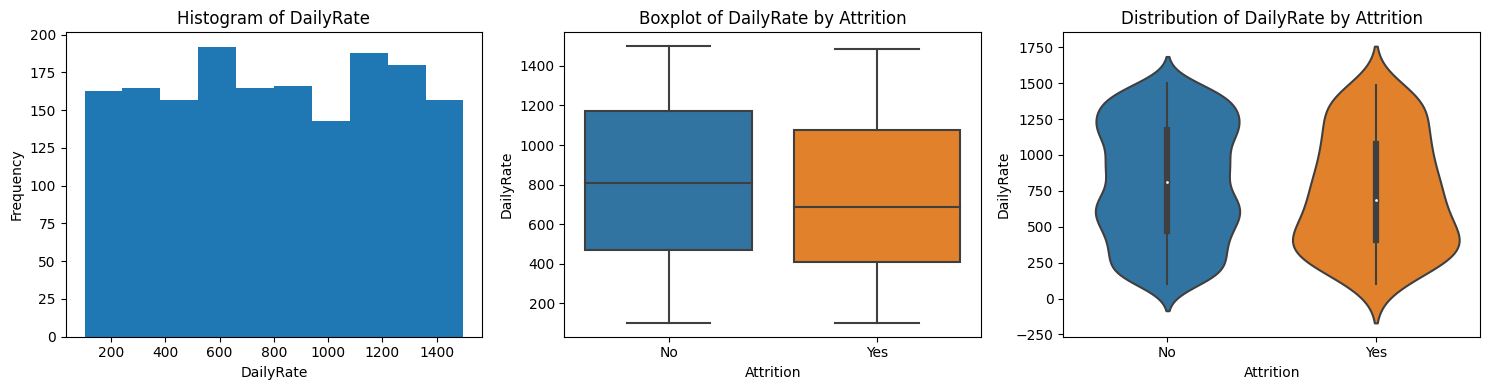

(" for 'DailyRate'distirbution is not normal",
 ('variance is equal', 'average are not equal'))

In [218]:
plots_statistical_analysis('DailyRate')

Visually it seems that the median for daily rate of Yes is lower than No as well as the mode.

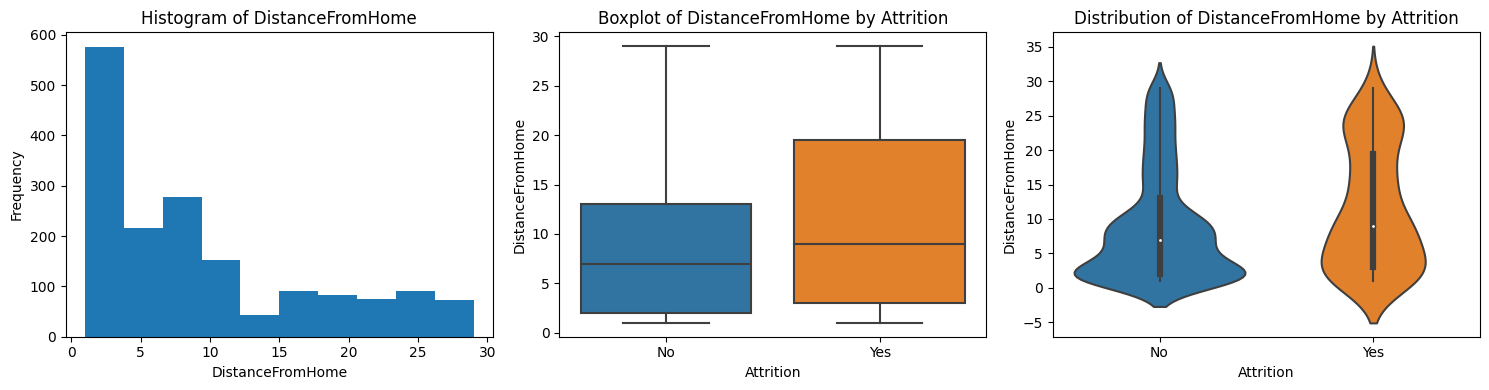

(" for 'DistanceFromHome'distirbution is not normal",
 ('variance is not equal', 'average are not equal'))

In [219]:
plots_statistical_analysis('DistanceFromHome')

The median distance from home for Yes is higher than No and 25% of nurses in 3rd quartile travel longer than nurses in the same quartile of NO. the distributions seem to have two mode the yes around 2.5 and 25 and No around 2.5 and 8.

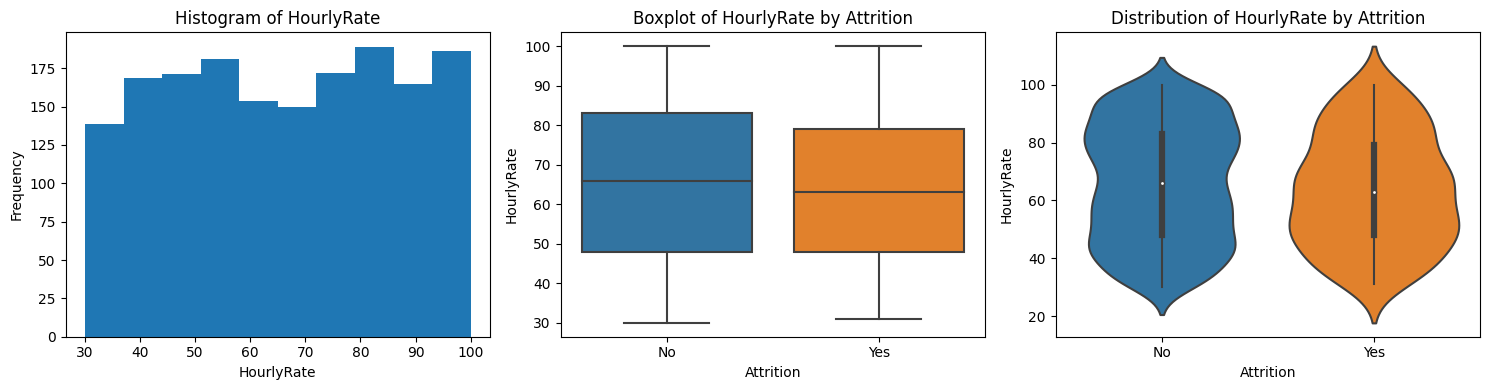

(" for 'HourlyRate'distirbution is not normal",
 ('variance is equal', 'average are equal'))

In [220]:
plots_statistical_analysis('HourlyRate')

Interstingly the hourly average are statistically equal. the median for No is slightly higher. The mode for no is aroud 80 while for yes around 50.

In [18]:
def plot_categorical(column_name):
    # Calculate the count and percentage of 'Attrition' values for each category in the column
    category_counts = df[column_name].value_counts()
    category_counts_attrition = df.groupby(column_name)['Attrition'].value_counts().unstack().fillna(0)
    category_percentages = (category_counts_attrition.T / category_counts_attrition.sum(axis=1)).T * 100

    # Plot the percentage of each category in the column based on 'Attrition'
    plt.figure(figsize=(8, 6))
    category_percentages.plot(kind='bar', stacked=True)
    plt.title('Percentage of {} by Attrition'.format(column_name))
    plt.xlabel('Attrition')
    plt.ylabel('Percentage')
    plt.legend(loc='lower right')
    plt.show()


<Figure size 800x600 with 0 Axes>

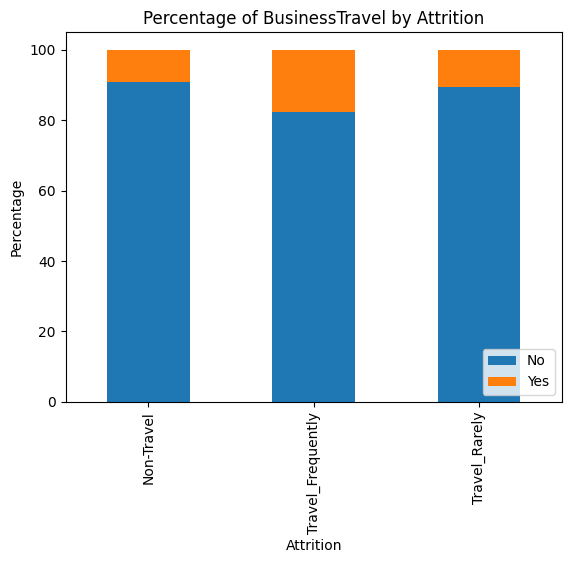

In [161]:
plot_categorical('BusinessTravel')

Those who have frequent travel Have a precentage of attrition Higher than the others. Also theose who don't travel or travel rarely have close percentages.

<Figure size 800x600 with 0 Axes>

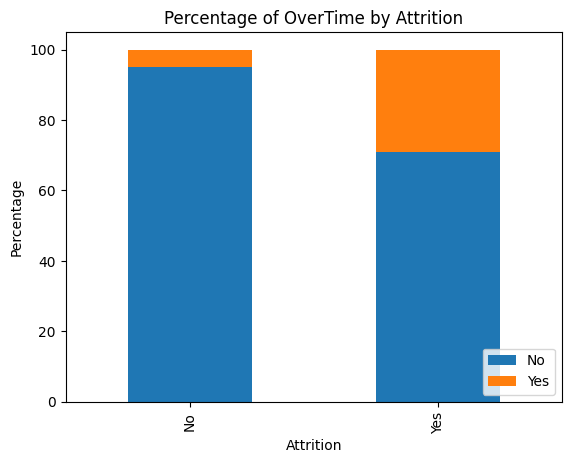

In [19]:
plot_categorical('OverTime')

<Figure size 800x600 with 0 Axes>

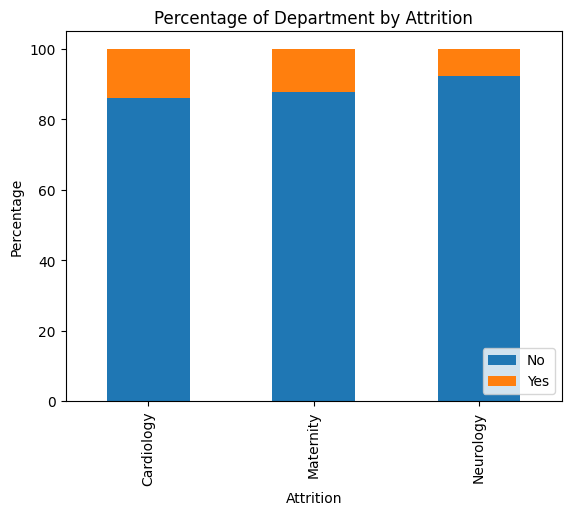

In [162]:
plot_categorical('Department')


The data shows 3 depatments in order Cardiologi, maternity and Neurology have higher attrition

<Figure size 800x600 with 0 Axes>

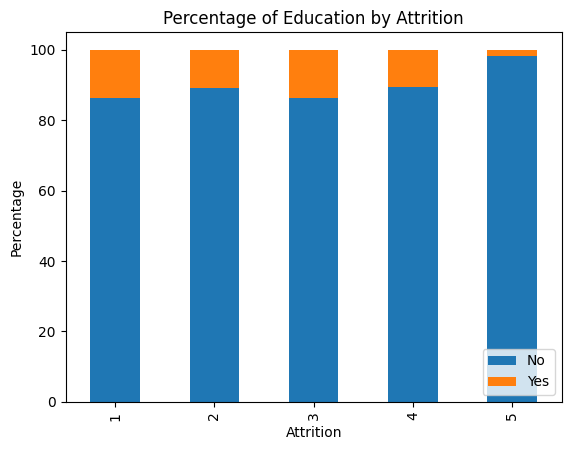

In [163]:
plot_categorical('Education')

The education category 5 have a lower percentage of attrition, 2 and 4 are similar as well as 1nad 3. Let's see if it is related to Daily rate

<Figure size 800x600 with 0 Axes>

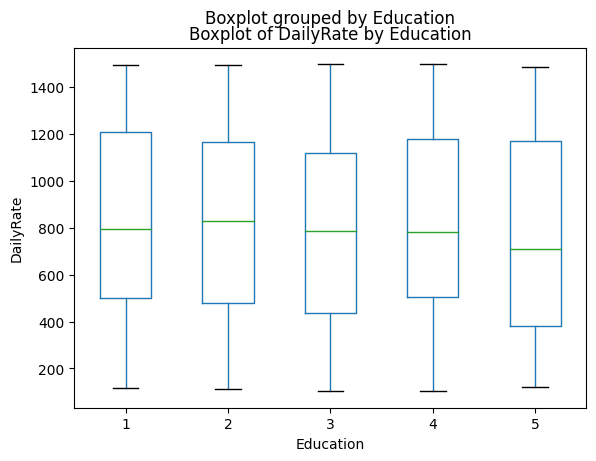

In [141]:
# Create a boxplot of Dailyrate based on Education
plt.figure(figsize=(8, 6))  # Set the size of the figure (optional)

df.boxplot(column='DailyRate', by='Education', grid=False)

# Set plot title and labels
plt.title('Boxplot of DailyRate by Education')
plt.xlabel('Education')
plt.ylabel('DailyRate')

# Show the plot
plt.show()

Not clear. We can see that the median for level 5 is lower. Let's do an Anova test for average equality.

In [147]:
level_1 = df[df['Education']==1]['DailyRate']
level_2 = df[df['Education']==2]['DailyRate']
level_3 = df[df['Education']==3]['DailyRate']
level_4 = df[df['Education']==4]['DailyRate']
level_5 = df[df['Education']==5]['DailyRate']
stat, p = stats.f_oneway(level_1, level_2, level_3, level_4,level_5)
p

0.32543455084181344

There is no significance difference in average in term of daily rate between level of education

<Figure size 800x600 with 0 Axes>

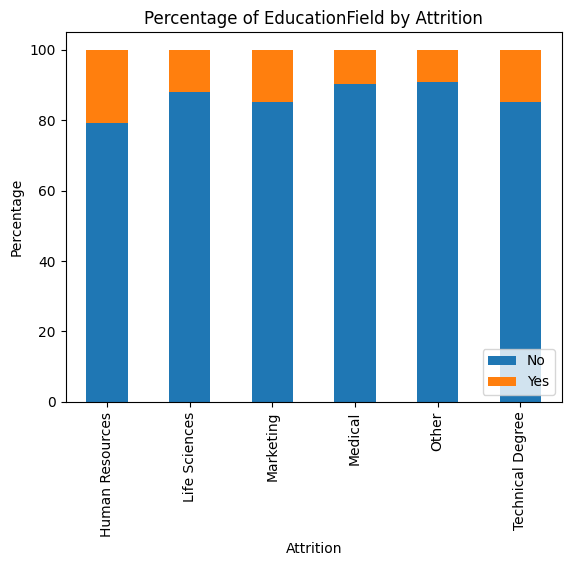

In [164]:
plot_categorical('EducationField')

In [ ]:
It seems Than field of education not related to Healthcare have higher Attrition than Lifescience, Medical and others

<Figure size 800x600 with 0 Axes>

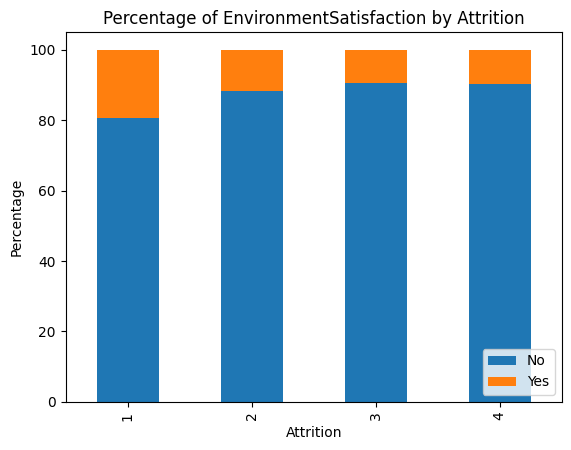

In [165]:
plot_categorical('EnvironmentSatisfaction')

The percentage of environement satisfaction 1 and 2 have higher percentage of Attrition than 3 and 4

<Figure size 800x600 with 0 Axes>

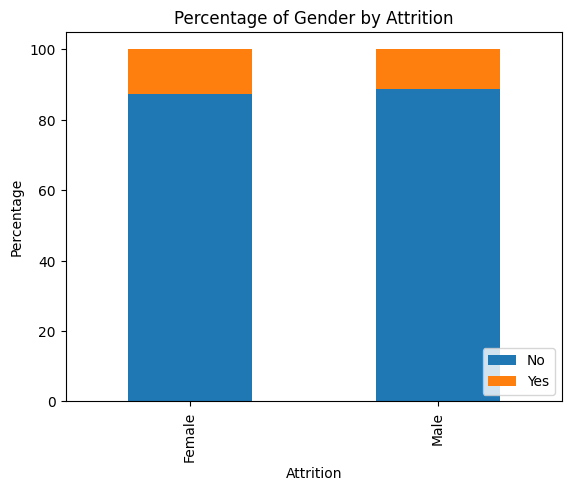

In [166]:
plot_categorical('Gender')

The Attrition seems equal between gender.

<Figure size 800x600 with 0 Axes>

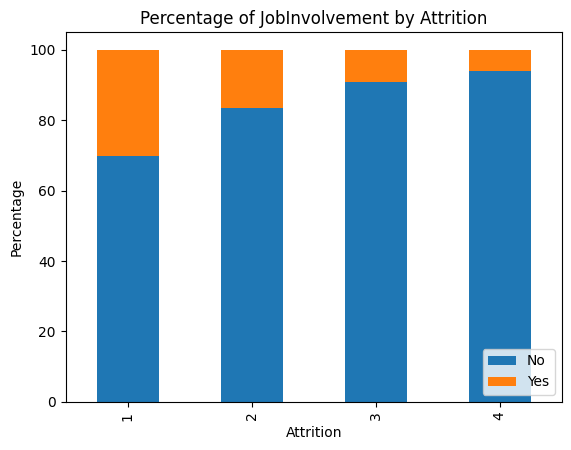

In [167]:
plot_categorical('JobInvolvement')

Jobinvolvement 1 and 2 are much higher than 3 and 4

<Figure size 800x600 with 0 Axes>

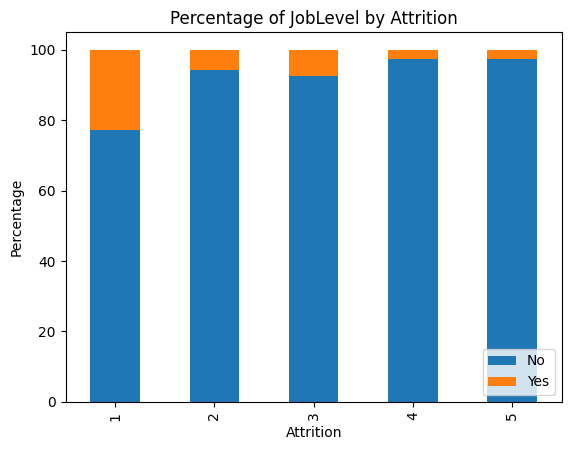

In [168]:
plot_categorical('JobLevel')

Joblevel 1,2,3 have higher percentage of Attrition than 4 and 5

<Figure size 800x600 with 0 Axes>

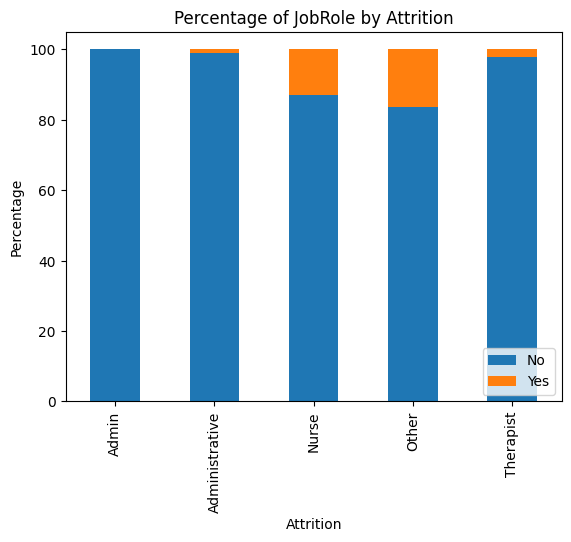

In [170]:
plot_categorical('JobRole')

We can see that Admin roles and Therapist has much lower Attrition than Nurses and Other

<Figure size 800x600 with 0 Axes>

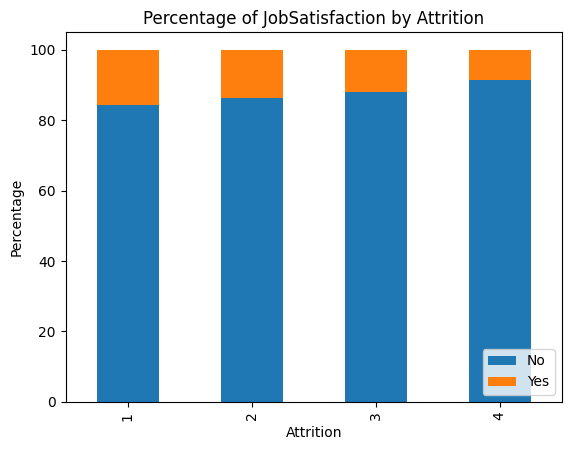

In [171]:
plot_categorical('JobSatisfaction')

For job satisfaction, it doesn't seem that the difference in attrition percentage is related to job satisfaction visually. We can see it is higher for 1,2, 3 than 4

<Figure size 800x600 with 0 Axes>

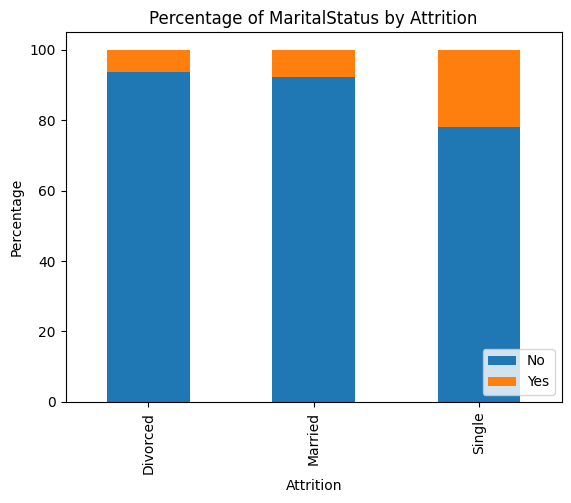

In [172]:
plot_categorical('MaritalStatus')

Single HC worker have higher percentahe of attrition.

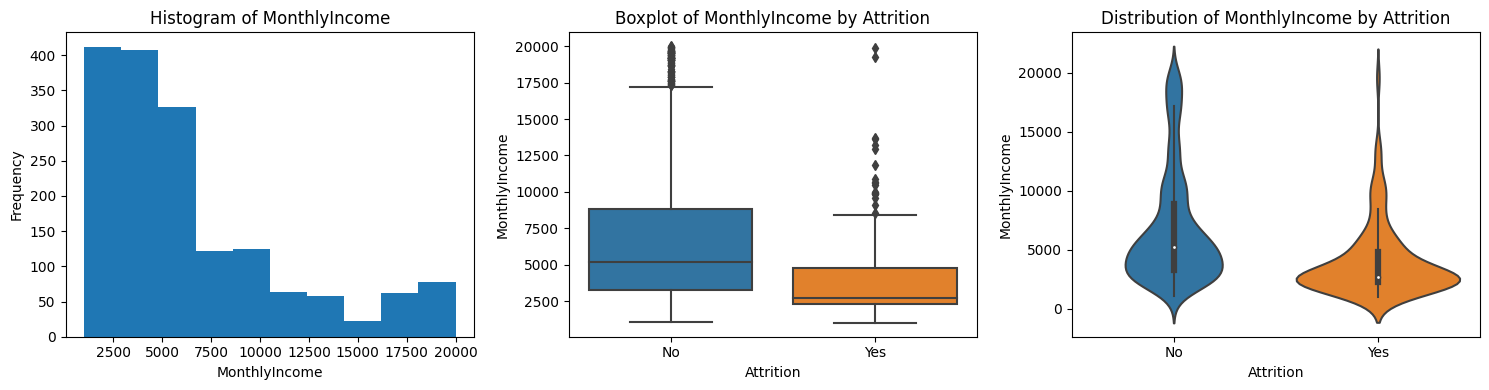

(" for 'MonthlyIncome'distirbution is not normal",
 ('variance is not equal', 'average are not equal'))

In [221]:
plots_statistical_analysis('MonthlyIncome')

The monthly income seems more critical than the daily and hourly rate when it comes impact on attrition 75% of people with yes have less month income than 50 % of of those with No.

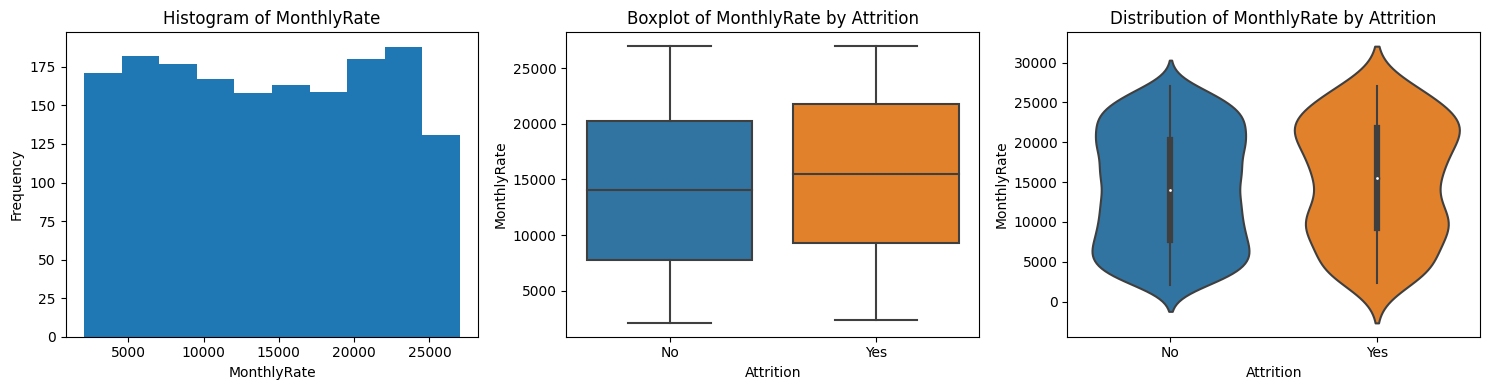

(" for 'MonthlyRate'distirbution is not normal",
 ('variance is equal', 'average are equal'))

In [222]:
plots_statistical_analysis('MonthlyRate')

The median is slightly higher for those with Yes.

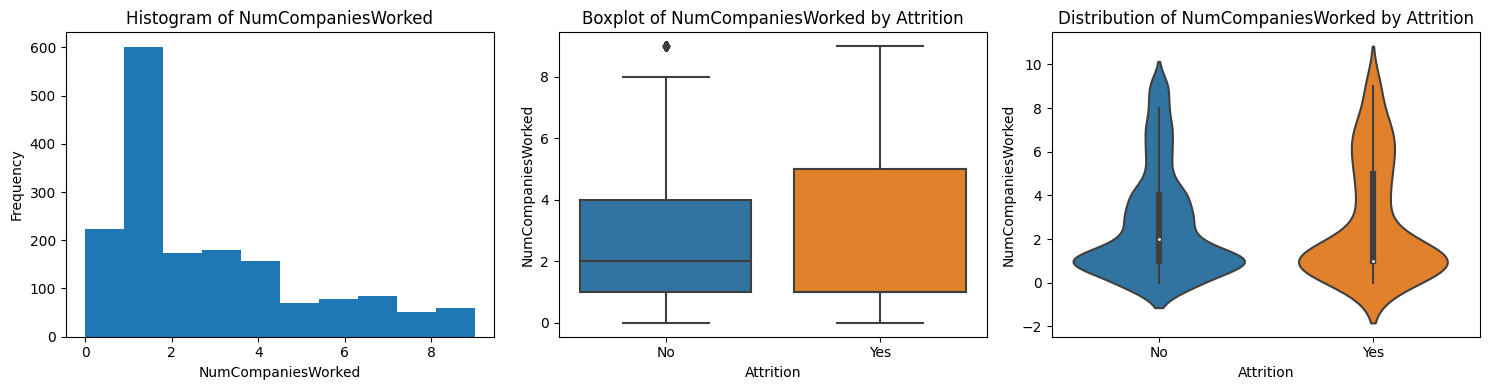

(" for 'NumCompaniesWorked'distirbution is not normal",
 ('variance is equal', 'average are equal'))

In [223]:
plots_statistical_analysis('NumCompaniesWorked')

In [ ]:
50% of Yes worked in single location while the median for no worked in 2

<Figure size 800x600 with 0 Axes>

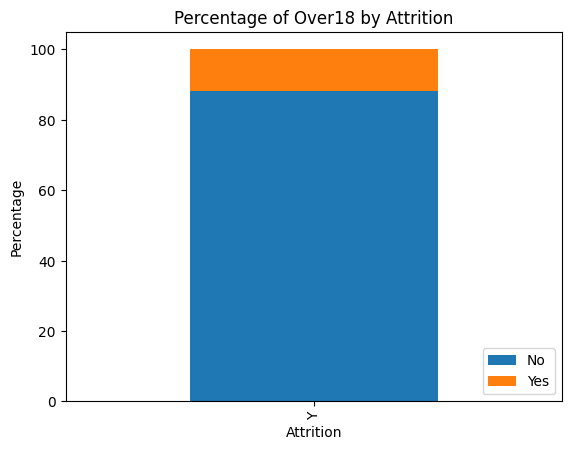

In [177]:
plot_categorical('Over18')

All the employees are over 18.

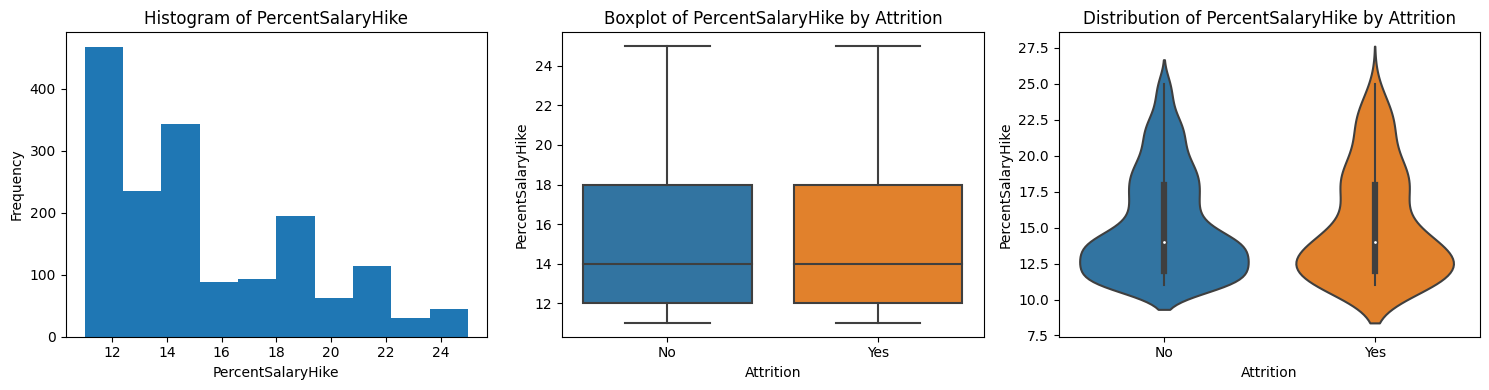

(" for 'PercentSalaryHike'distirbution is not normal",
 ('variance is equal', 'average are equal'))

In [224]:
plots_statistical_analysis('PercentSalaryHike')

No difference in term of percentSalary hike

<Figure size 800x600 with 0 Axes>

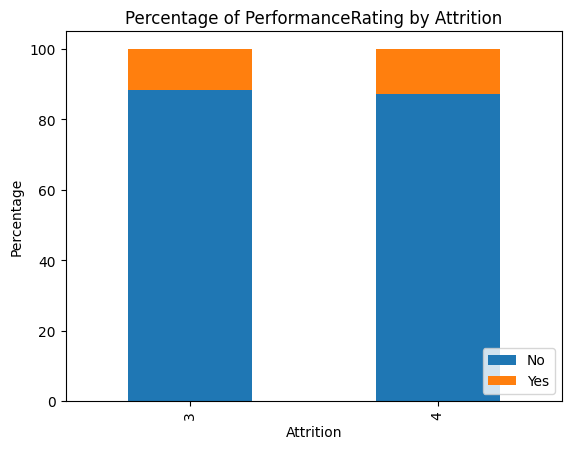

In [180]:
plot_categorical('PerformanceRating')

The performance rating has two categories only and the Attrition percentage seems to be very close in both categories

<Figure size 800x600 with 0 Axes>

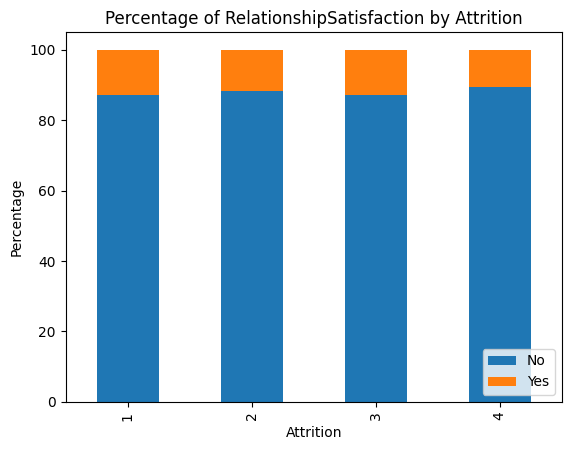

In [181]:
plot_categorical('RelationshipSatisfaction')

relation satisfaction doesn't seem to make clear difference in percentage of attrition

<Figure size 800x600 with 0 Axes>

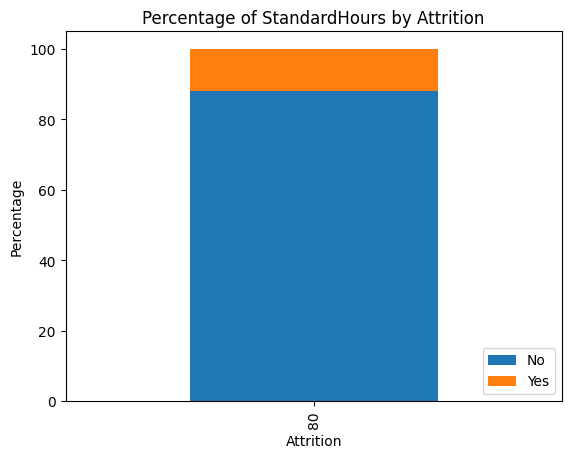

In [182]:
plot_categorical('StandardHours')

Everyone has the same value in term of standard hours

<Figure size 800x600 with 0 Axes>

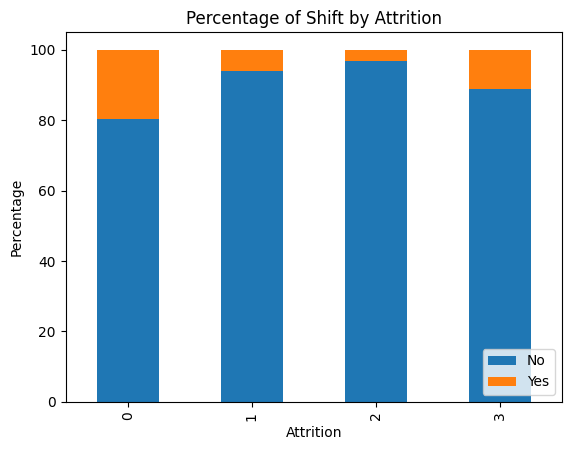

In [183]:
plot_categorical('Shift')

Shift 0, 3 have highest Attrition than 1 and 2 in order.

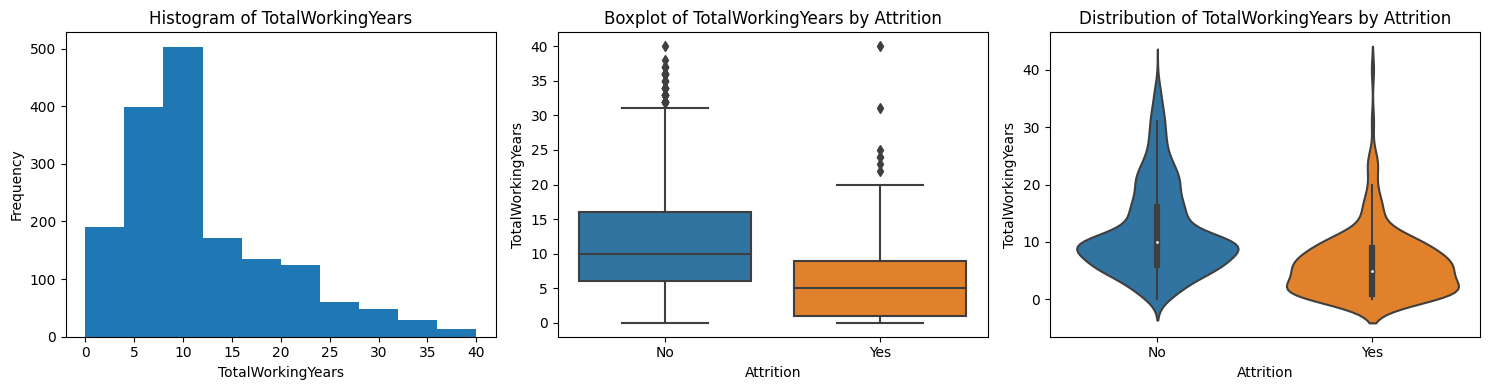

(" for 'TotalWorkingYears'distirbution is not normal",
 ('variance is not equal', 'average are not equal'))

In [225]:
plots_statistical_analysis('TotalWorkingYears')

75% of people who left have less than 10 working years experience. 50% percentage of No have more than 10 years of working experience

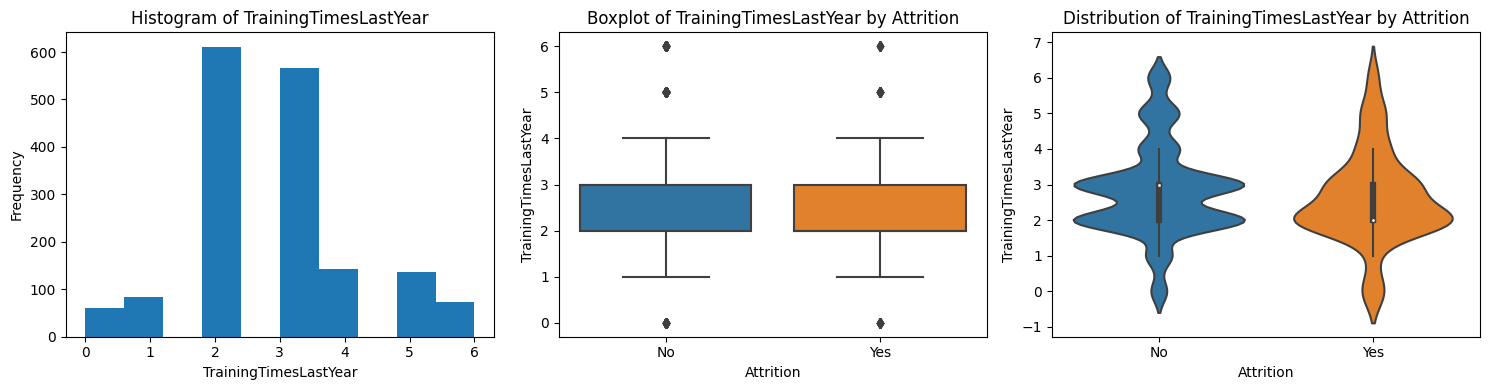

(" for 'TrainingTimesLastYear'distirbution is not normal",
 ('variance is equal', 'average are not equal'))

In [226]:
plots_statistical_analysis('TrainingTimesLastYear')

For No 50% had more than 3 training. For yes 50% had less than 2 training. The mode for No is 2 and 3 (bimodal) while for yes is 2.

<Figure size 800x600 with 0 Axes>

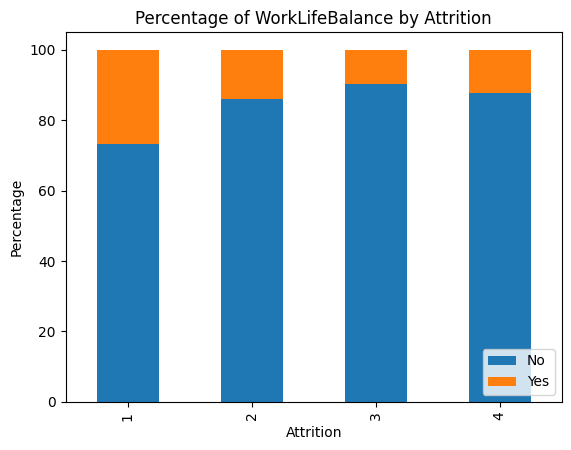

In [187]:
plot_categorical('WorkLifeBalance')

rating1 have double percentage attrition than others

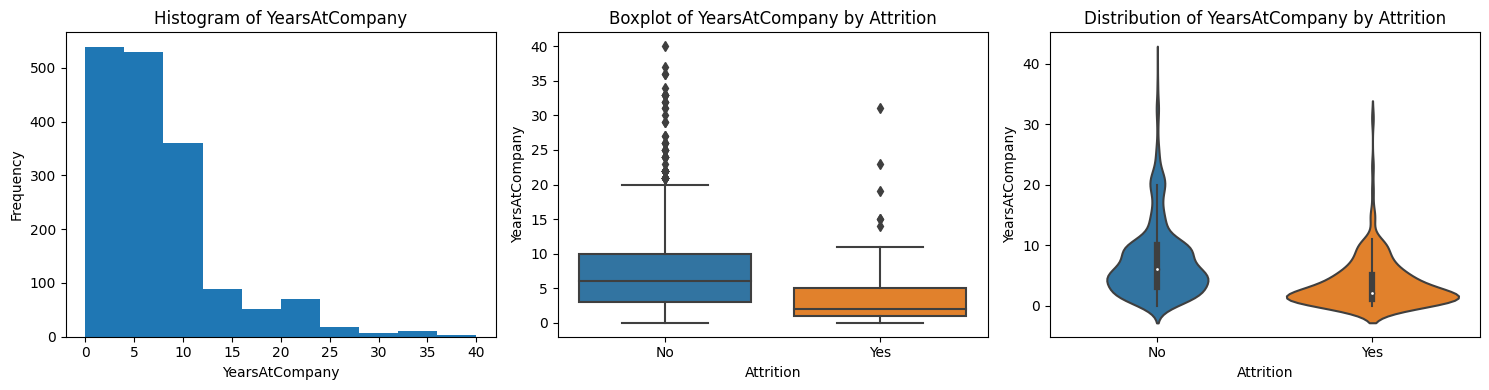

(" for 'YearsAtCompany'distirbution is not normal",
 ('variance is not equal', 'average are not equal'))

In [227]:
plots_statistical_analysis('YearsAtCompany')

The ones with Yes have definitely less than 10 years with the organization with a median of 2.5. 25% of the one with No have more than 10 years and he median for no is about 6 years.

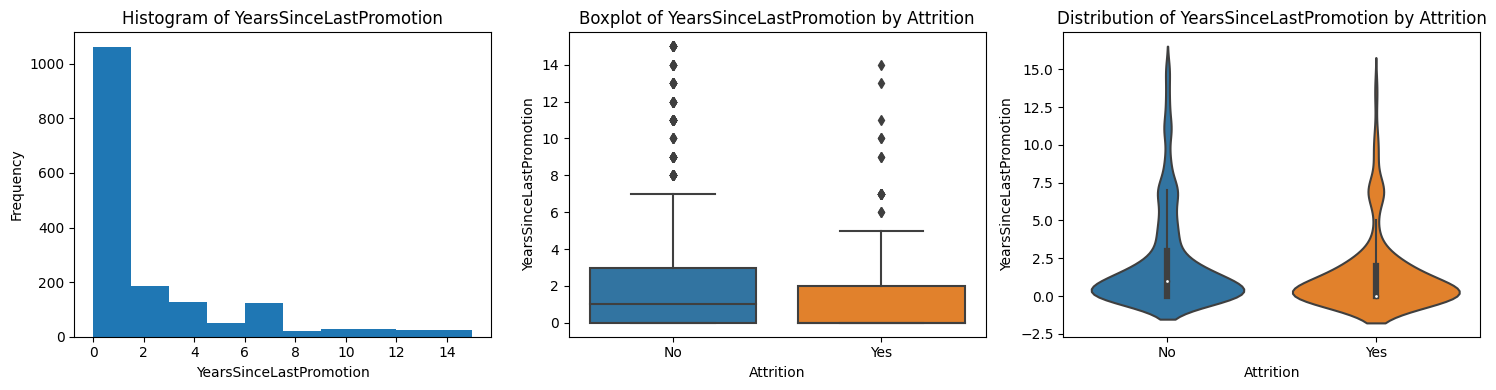

(" for 'YearsSinceLastPromotion'distirbution is not normal",
 ('variance is not equal', 'average are not equal'))

In [228]:
plots_statistical_analysis('YearsSinceLastPromotion')

In [4]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

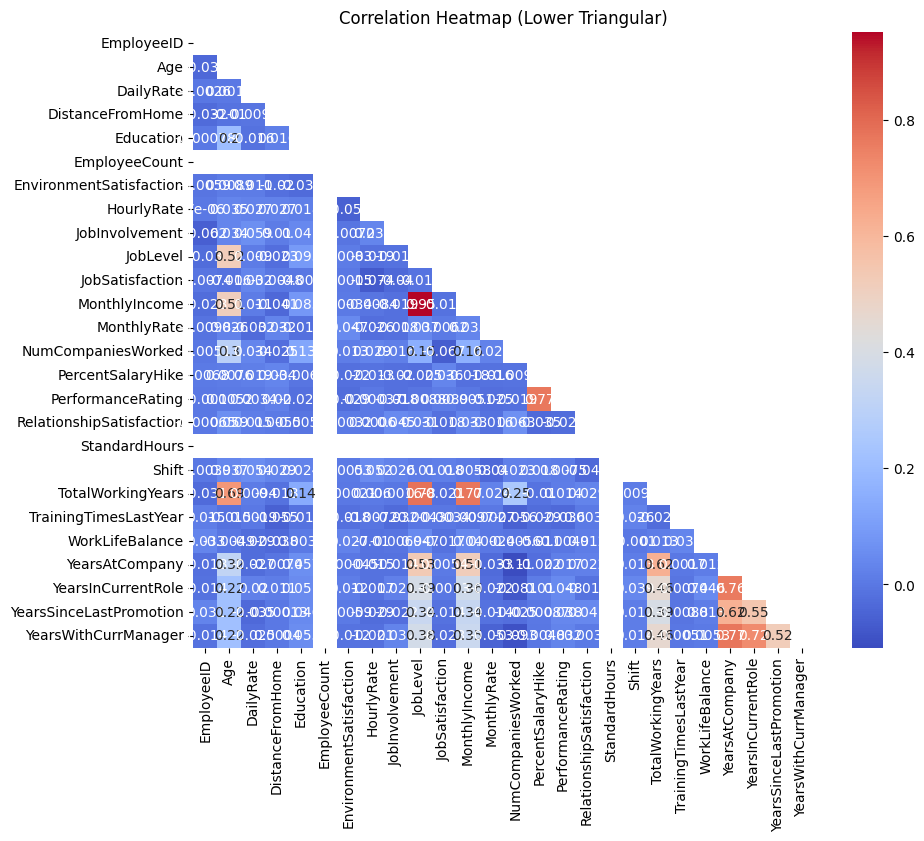

In [6]:
# # Select the columns for the heatmap
# columns = ['Age', 'DailyRate', 'DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','JobEvaluation']

# Create a subset of the DataFrame with the selected columns
subset = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = subset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,  cmap='coolwarm', mask=mask)

# Set the plot title
plt.title('Correlation Heatmap (Lower Triangular)')

# Show the plot
plt.show()



In [9]:
stat, p = stats.pearsonr(df['MonthlyIncome'], df['JobLevel'])
p

0.0

In [257]:
stat, p = stats.pearsonr(df['MonthlyIncome'], df['JobEvaluation'])
p

0.0

There is a corelation between both 'MonthlyIncome', 'JobEvaluation'

In [259]:
stat, p = stats.pearsonr(df['TotalWorkingYears'], df['JobEvaluation'])
p

1.0753891102044369e-210

In [260]:
stat, p = stats.pearsonr(df['TotalWorkingYears'], df['YearsAtCompany'])
p

2.0099797120094477e-180